In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [2]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

The dataset contains 10,000 observations and 14 columns representing machine identifiers, operating conditions, sensor measurements, and failure indicators. All columns have complete data with no missing values. Numeric features include temperatures, rotational speed, torque, and tool wear, while categorical features include product ID and machine type. The target variable for this analysis is Machine failure, which indicates whether a failure occurred.

In [6]:
target = "Machine failure"

features = [col for col in df.columns if col != target]
features

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [7]:
df[target].value_counts(normalize=True)

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

In [8]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("[", "", regex=False)
    .str.replace("]", "", regex=False)
)
df.columns

In [10]:
target = "machine_failure"

failure_type_cols = ["twf", "hdf", "pwf", "osf", "rnf"]

predictor_cols = [
    col for col in df.columns
    if col not in [target] + failure_type_cols
]

predictor_cols

['udi',
 'product_id',
 'type',
 'air_temperature_k',
 'process_temperature_k',
 'rotational_speed_rpm',
 'torque_nm',
 'tool_wear_min']

In [ ]:
To avoid data leakage, failure type indicators (TWF, HDF, PWF, OSF, RNF) are excluded from predictive features. These variables describe the cause of failure and would not be available prior to a failure event. The model will instead rely on operational and sensor-based features to estimate failure risk.

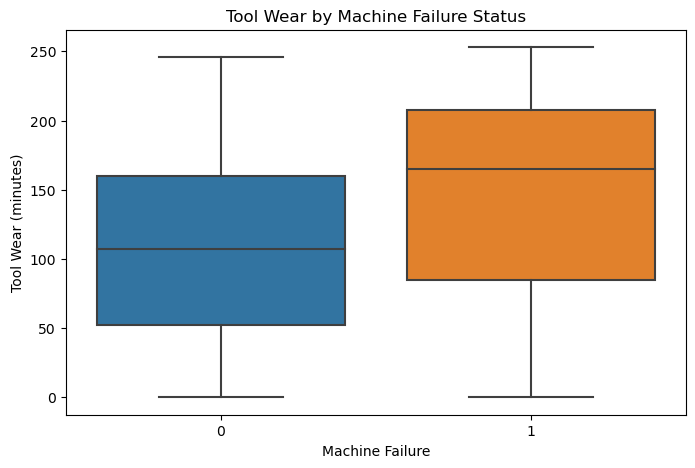

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="machine_failure", y="tool_wear_min")
plt.title("Tool Wear by Machine Failure Status")
plt.xlabel("Machine Failure")
plt.ylabel("Tool Wear (minutes)")
plt.show()

The distribution shows that machines experiencing failures tend to have higher tool wear compared to non-failure cases. This suggests that accumulated tool wear is a meaningful risk factor and supports its inclusion as a key predictive feature for failure risk.

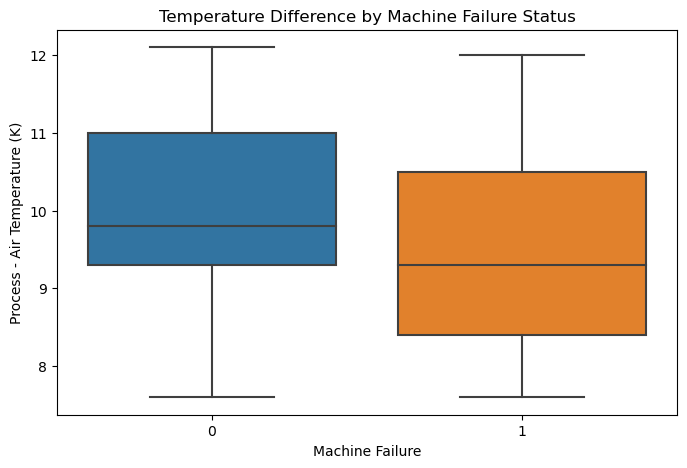

In [12]:
df["temp_diff"] = df["process_temperature_k"] - df["air_temperature_k"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="machine_failure", y="temp_diff")
plt.title("Temperature Difference by Machine Failure Status")
plt.xlabel("Machine Failure")
plt.ylabel("Process - Air Temperature (K)")
plt.show()

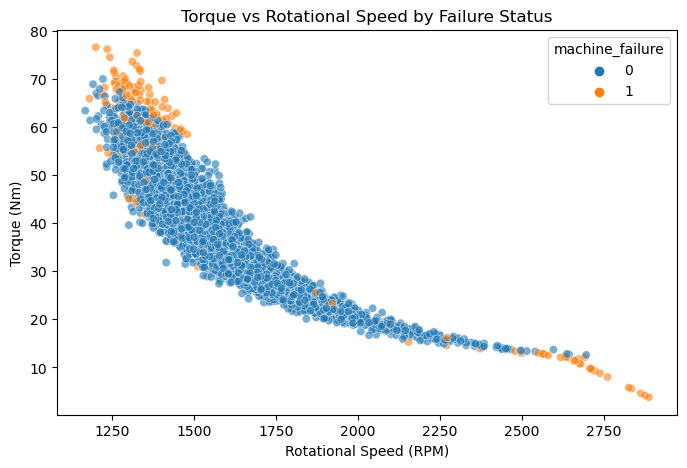

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="rotational_speed_rpm",
    y="torque_nm",
    hue="machine_failure",
    alpha=0.6
)
plt.title("Torque vs Rotational Speed by Failure Status")
plt.xlabel("Rotational Speed (RPM)")
plt.ylabel("Torque (Nm)")
plt.show()

Exploratory analysis suggests that machine failures are associated with higher tool wear and occur more frequently under high mechanical stress conditions. Temperature differences show modest separation between failure and non-failure cases, indicating that thermal behavior may contribute to failure risk when combined with other operational factors. These findings support a multivariate modeling approach rather than reliance on any single feature.